In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



loading the dataset


In [89]:
data=pd.read_csv('/content/insurance.csv')
#print(data.head())
print(data.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Performing eda on the data**

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [91]:

print(data.describe())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


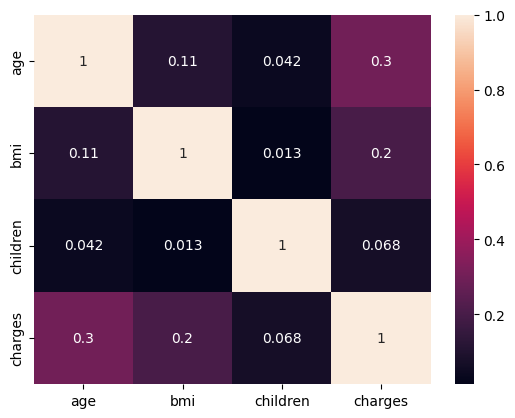

In [92]:
co=data.corr(numeric_only=True)
sns.heatmap(co,annot=True)
plt.show()

bmi and age plays a major role in determining bill

In [93]:
data.groupby('sex').count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [94]:
data.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [95]:
data.groupby('region').count().sort_values('charges',ascending=False)

,age,sex,bmi,children,smoker,charges
region,,,,,,
southeast,364,364,364,364,364,364
northwest,325,325,325,325,325,325
southwest,325,325,325,325,325,325
northeast,324,324,324,324,324,324


In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['region']=le.fit_transform(data['region'])
data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])

In [97]:
x=data.drop(columns='charges',axis=1)
y=data['charges']

In [98]:

print(data.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [99]:
print(data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [100]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
lr.fit(x_train,y_train)

LinearRegression()

In [101]:
y_pred=lr.predict(x_test)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_score=lr.score(x_test,y_test)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Accuracy Score: {accuracy_score}')




Mean Squared Error: 42678138.35376552
R² Score: 0.6957010622294885
Accuracy Score: 0.6957010622294885


In [106]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_score = lr.score(x_test, y_test)

print("Linear Regression:")
print(f"→ Mean Squared Error: {mse}")
print(f"→ R² Score: {r2}")
print(f"→ Model Score (Accuracy): {accuracy_score}")
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, x, y, cv=5, scoring='r2'))


# Ridge Regression with alpha=1.0
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_r = ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_r)
r2_ridge = r2_score(y_test, y_pred_r)
score_ridge = ridge.score(x_test, y_test)
print()

print("\nRidge Regression:")
print(f"→ Mean Squared Error: {mse_ridge}")
print(f"→ R² Score: {r2_ridge}")
print(f"→ Model Score (Accuracy): {score_ridge}")

# Lasso Regression with alpha=0.1
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_l = lasso.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_l)
r2_lasso = r2_score(y_test, y_pred_l)
score_lasso = lasso.score(x_test, y_test)

print("\nLasso Regression:")
print(f"→ Mean Squared Error: {mse_lasso}")
print(f"→ R² Score: {r2_lasso}")
print(f"→ Model Score (Accuracy): {score_lasso}")
print(lasso.coef_)


Linear Regression:
→ Mean Squared Error: 33635210.431178406
→ R² Score: 0.7833463107364539
→ Model Score (Accuracy): 0.7833463107364539
[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]


Ridge Regression:
→ Mean Squared Error: 33675792.15420229
→ R² Score: 0.78308491263913
→ Model Score (Accuracy): 0.78308491263913

Lasso Regression:
→ Mean Squared Error: 33635622.34591467
→ R² Score: 0.7833436574797585
→ Model Score (Accuracy): 0.7833436574797585
[ 2.57055512e+02 -1.83472279e+01  3.35775548e+02  4.25024815e+02
  2.36471704e+04 -2.71198180e+02]
